In [1]:
from environments.e_greedy import DeepTradingEnvironment, LinearAgent
import datetime
import numpy as np
import pandas as pd
from utils import train_val_test
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.cla import CLA


out_reward_window=datetime.timedelta(days=7)
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window":out_reward_window ,
                   "state_type":"in_window_out_window",
                   "include_previous_weights":False}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001,
                        }
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)


env = DeepTradingEnvironment.build_environment_from_dirs_and_transform(meta_parameters, objective_parameters,data_hash="real_data", data_dir="data_env")


number_of_assets = env.number_of_assets

sigma = np.zeros(number_of_assets)
mus = np.zeros(number_of_assets)
for i in range(0,number_of_assets):
    sigma[i] = np.std(env.features.iloc[:,i])**2
    mus[i] = np.mean(env.features.iloc[:,i])
    
print("sigma", sigma)
print("mus", mus)

cov = np.zeros((number_of_assets, number_of_assets))
np.fill_diagonal(cov, sigma)

print("cov", cov)

# mus=np.array([assets_simulation_details["asset_1"]["mean"],assets_simulation_details["asset_2"]["mean"]])

ef = EfficientFrontier(mus, cov)
# weights = ef.max_sharpe(risk_free_rate=0)
weights = ef.min_volatility()
print("minimum volatility weights",weights)


===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(days=7), 'state_type': 'in_window_out_window', 'include_previous_weights': False}
===Objective Parameters===
{'percent_commission': 0.001}
sigma [1.44646126e-06 4.48465349e-07 2.24204728e-06 1.88510629e-06
 2.03179057e-06 1.40987859e-06 2.41422706e-06]
mus [1.14806798e-06 2.20214864e-06 8.55002700e-06 6.87477938e-06
 5.87302424e-06 6.44098931e-06 3.78045701e-06]
cov [[1.44646126e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 4.48465349e-07 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.24204728e-06 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.88510629e-06
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.03179057e-06 0.00000000e+00 0.00000000e+0

In [2]:
# test code 
np.std(env.features.iloc[:,1])**2

4.4846534901097014e-07

In [3]:

x=np.array(list(weights.values())).reshape(-1,1)
p_vol=np.sqrt(np.matmul(np.matmul(x.T,cov),x))
p_sharpe=np.matmul(x.T,mus)/p_vol
linear_agent=LinearAgent(environment=env,out_reward_window_td=out_reward_window,
                         reward_function="cum_return",sample_observations=4)
linear_agent.set_plot_weights(weights=np.array(list(weights.values())),
                              benchmark_G=-p_vol.ravel()[0])

pre-sampling indices: 100%|███████████████████████████████████████████████████| 109652/109652 [03:55<00:00, 465.72it/s]


 50%|███████████████████████████████████████▌                                        | 198/400 [00:08<00:08, 24.16it/s]

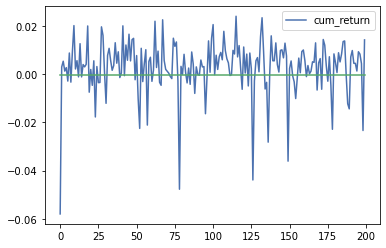

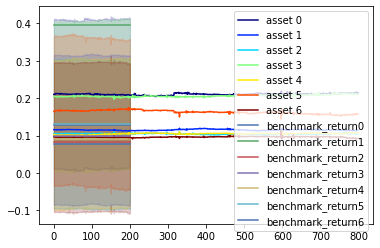

100%|███████████████████████████████████████████████████████████████████████████████▊| 399/400 [00:17<00:00, 22.48it/s]

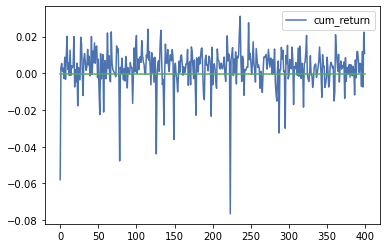

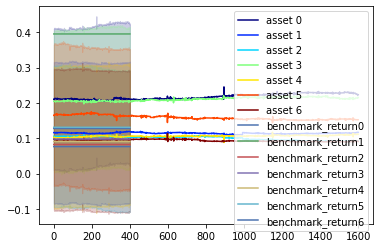

[]

In [4]:
# linear_agent.REINFORCE_fit()
linear_agent.REINFORCE_fit(max_iterations=400, add_baseline=False)

In [5]:
# linear_agent.REINFORCE_fit(add_baseline=True)

In [6]:
# env.__dict__

{'features':                            EEMV.parquet_log_returns  HYG.parquet_log_returns  \
 index                                                                          
 2014-07-18 19:00:00+00:00                  0.000000                 0.000000   
 2014-07-18 19:30:00+00:00                  0.000000                 0.000000   
 2014-07-18 20:00:00+00:00                  0.000000                 0.000000   
 2014-07-18 20:30:00+00:00                  0.000000                 0.000000   
 2014-07-18 21:00:00+00:00                  0.000000                 0.000000   
 ...                                             ...                      ...   
 2020-11-16 03:00:00+00:00                  0.000000                 0.000000   
 2020-11-16 03:30:00+00:00                  0.000000                 0.000000   
 2020-11-16 04:00:00+00:00                  0.000000                 0.000000   
 2020-11-16 04:30:00+00:00                  0.000000                 0.000000   
 2020-11-16 05:0

In [33]:
# import importlib
# import utils
# utils= importlib.reload(utils)

In [34]:
train_val_test(env)

y index
2014-07-18 19:00:00+00:00    0.003687
2014-07-18 19:30:00+00:00    0.003528
2014-07-18 20:00:00+00:00    0.003300
2014-07-18 20:30:00+00:00    0.002675
2014-07-18 21:00:00+00:00    0.003213
                               ...   
2020-11-16 03:00:00+00:00    0.001141
2020-11-16 03:30:00+00:00    0.001357
2020-11-16 04:00:00+00:00    0.002165
2020-11-16 04:30:00+00:00    0.001583
2020-11-16 05:00:00+00:00   -0.001651
Length: 110997, dtype: float64
TRAIN [    0     1     2 ... 79579 79580 79581]
VALIDATION [79918 79919 79920 ... 88794 88795 88796]
